# Assignment 2: Memory Task List Generation (Solution)
## Computational Methods in Psychology and Neuroscience
### Psychology 4215/7215 --- Fall 2023

# Objectives

Upon completion of this assignment, the student will have:

1. Read in a stimulus pool from a file.

2. Created unique trial conditions with sequential constraints.

3. Generated randomized lists to use in a recognition experiment.


# Assignment

* Write code in a Jupyter notebook (after making a copy and renaming it to have your userid in the title --- e.g., A02_Memory_ListGen_mst3k).

## Design

Your assignment is to write a script that creates lists of dictionaries that you will later present to participants as part of an experiment.  

The script should be configurable such that you can specify different
numbers of lists and trials, along with other details specific to the
experiment you decide to do.

Each dictionary represents a trial and should contain all the
information necessary to identify the stimulus to be presented,
details about that stimulus, and the condition in which to present it.
This information will be experiment-specific, as outlined below.

You have two options for your experiment.  Please select **one** of
the following experiments, keeping in mind that your next assignment
will be to code the experiment presentation and response collection
for the lists you generate from this assignment.
  
* ***When you are done, make sure you have run every cell, so that we can see it ran without error and produces the correct output. Then please save the notebook as HTML (`File -> Download as -> HTML`) and upload it to the matching assignment on Canvas.***  

## Option 1: Refreshing Valence Study

The main question of this study is whether recognition memory for
words depends on the emotional or affective valence of those words and whether there is an interaction between attention refreshing and valence.

Participants will study lists of positive (+), negative (-), and
neutral (~) words and then, after a short delay, they will be given a
recognition test over all the studied target words plus a matched set
of non-studied lures.  The stimuli are contained in three separate CSV
files:

- [Positive Pool](./pos_pool.csv)
- [Negative Pool](./neg_pool.csv)
- [Neutral Pool](./neu_pool.csv)

You will need to read these files in as lists of dictionaries (hint,
use the ``DictReader`` from the ``csv`` module that was covered in
class.)  

Use these pools to create lists with trials of valence crossed with three experimental conditions:

1. *Repeated*: Where a word will be immediately repeated as the next word.
2. *Refreshed*: Where you will indicate the participant should "refresh" the previous word by presenting a "+".
3. *Once-presented*: Where a word is only presented once and is *not* repeated or refreshed.

We suggest that you generate the study items for a list in two stages. In the first stage you shuffle all combinations of the trial types (Valence crossed with Condition). In the second stage you loop over those conditions and append trials to a block depending on the information in each trial type. For the Repeated and Refreshed you would append two items, for the Once-presented you would only append one.

You will need to generate a matching test list for each study list
that includes all the studied items, plus a set of lures that match
the valence of the studied words.

Be sure to add in information to each trial dictionary that identifies
the word, its valence, the condition of that trial, and whether it is a
target or a lure.  Feel free to add in more information if you would
like.

## Option 2: Spacing Scene Study

This study will test whether recognition memory for indoor and outdoor
scenes is modulated by whether the items are once-presented, repeated immediately following the first presentation of the item (i.e., massed repetition), or repeated after a number of other items (i.e., spaced repetition). The participants will then be given a
recognition test over all the studied target images plus a matched set
of non-studied lures.  You can access the lists of stimuli available:

- [Indoor Pool](./indoor.csv)
- [Outdoor Pool](./outdoor.csv)

You will need to read these files in as lists of dictionaries (hint,
use the ``DictReader`` from the ``csv`` module that was covered in
class.)  For the actual experiment we will give you the images that
are referenced by the file names in these pools, but for the list
generation you do not need the images, themselves and should identify
the image you will be presenting using the file name.  

Use these pools to create lists of trials for the experimental conditions consiting of indoor/outdoor vs once-presented/massed/spaced items. Each
list should contain an equal number of each combination of these conditions in *random* order, but handling the spaced items will take some care. 

While the massed items come immediately after the first time the item was presented, the spaced repetitions need to come at a range of 3 to 7 (though this should be a configuration variable) items following the first presentation of the matching item. We will provide some suggestions for how to attain this structure in class discussions, but generally following a two-stage approach of shuffling all possible conditions first and then filling in specific items will work best. *Note, you can not have a spaced item condition in the last two slots on the list because it would not be possible to have the repetition be spaced.*

You will need to generate a matching test list for each study list
that includes all the studied items, plus a set of lures that match
the image categories from the studied items.

Be sure to add in information to each trial dictionary that identifies
the file name, the category of the image, the condition of the trial,
and whether it is a target or a lure.


## General Code for Both Experiments

In [27]:
# some useful imports
import random
import csv
from copy import deepcopy
import pickle

In [32]:
# Code to read in the pools
def read_and_shuffle(pool_file):
    """Read in and shuffle a pool."""
    # create a dictionary reader
    dr = csv.DictReader(open(pool_file, 'r'))

    # read in all the lines into a list of dicts
    pool = [l for l in dr]

    # shuffle it so that the we get new items each time
    random.shuffle(pool)
    
    # report out some pool info
    print(pool_file, len(pool))

    # return the shuffled pool
    return pool

## Refreshing Experiment ListGen

In [102]:
# Config Section
pool_files = {'pos': 'pos_pool.csv',
              'neg': 'neg_pool.csv',
              'neu': 'neu_pool.csv'}

rep_conds = ['once', 'repeat', 'refresh']
val_conds = ['pos', 'neg', 'neu']

# what to show for refreshed items
ref_text = '+'

num_reps = 1
num_blocks = 1

In [103]:
# read all the pools into a dictionary
pools = {val: read_and_shuffle(pool_files[val])
         for val in val_conds}

# show the first 5 items of the pos pool
pools['pos'][:5]

pos_pool.csv 301
neg_pool.csv 292
neu_pool.csv 208


[{'description': 'sunlight',
  'word_no': '1003',
  'valence_mean': '7.7599999999999998',
  'valence_sd': '1.4299999999999999',
  'arousal_mean': '6.0999999999999996',
  'arousal_sd': '2.2999999999999998',
  'dominance_mean': '5.6299999999999999',
  'dominance_sd': '2.1499999999999999',
  'word_frequency': '17'},
 {'description': 'safe',
  'word_no': '967',
  'valence_mean': '7.0700000000000003',
  'valence_sd': '1.8999999999999999',
  'arousal_mean': '3.8599999999999999',
  'arousal_sd': '2.7200000000000002',
  'dominance_mean': '5.8099999999999996',
  'dominance_sd': '2.0600000000000001',
  'word_frequency': '58'},
 {'description': 'hopeful',
  'word_no': '212',
  'valence_mean': '7.0999999999999996',
  'valence_sd': '1.46',
  'arousal_mean': '5.7800000000000002',
  'arousal_sd': '2.0899999999999999',
  'dominance_mean': '5.4100000000000001',
  'dominance_sd': '1.9199999999999999',
  'word_frequency': '12'},
 {'description': 'blue',
  'word_no': '544',
  'valence_mean': '6.7599999999

In [104]:
# create the conds
# fully crossed with all combos of val and rep
conds = []
for val in val_conds:
    for rep in rep_conds:
        # I decided to call the repetition condition cond
        conds.append({'valence': val, 'cond': rep})
conds

[{'valence': 'pos', 'cond': 'once'},
 {'valence': 'pos', 'cond': 'repeat'},
 {'valence': 'pos', 'cond': 'refresh'},
 {'valence': 'neg', 'cond': 'once'},
 {'valence': 'neg', 'cond': 'repeat'},
 {'valence': 'neg', 'cond': 'refresh'},
 {'valence': 'neu', 'cond': 'once'},
 {'valence': 'neu', 'cond': 'repeat'},
 {'valence': 'neu', 'cond': 'refresh'}]

In [105]:
# make a function for generating a block
# with a study and test list
def make_block():
    """Generate a block, uses global variables"""
    # loop and create the repeated conditions
    block_conds = []
    for i in range(num_reps):
        # extend the trials with copies of the conditions
        block_conds.extend(deepcopy(conds))

    # shuffle the conds for that block
    random.shuffle(block_conds)

    # loop over block conds and add items to study/test lists
    study_list = []
    test_list = []
    for cond in block_conds:
        # use the valence to grab study and test items
        study_item = pools[cond['valence']].pop()
        test_item = pools[cond['valence']].pop()

        # update with the cond info
        study_item.update(cond)
        test_item.update(cond)

        # add in relevant info for study and test
        study_item['pres_num'] = 1
        study_item['type'] = 'target'
        test_item['type'] = 'lure'
        test_item['pres_num'] = 1   # just so the keys match

        # append them to the respective lists
        # study item is added to both study and test
        study_list.append(study_item)
        test_list.append(study_item)
        test_list.append(test_item)

        # process the repetition and refresh conditions
        if cond['cond'] in ['refresh', 'repeat']:
            # copy the study item
            rep_item = deepcopy(study_item)

            # modify required values
            rep_item['pres_num'] = 2

            # change the description if refreshing
            if cond['cond'] == 'refresh':
                rep_item['description'] = ref_text

            # append it to the study list
            study_list.append(rep_item)
            
    # must shuffle the test list
    random.shuffle(test_list)
    
    # make a dictionary to return
    block = {'study': study_list, 'test': test_list}
    
    return block

# generate the proper number of blocks
blocks = []
for b in range(num_blocks):
    blocks.append(make_block())


In [106]:
blocks

[{'study': [{'description': 'loser',
    'word_no': '851',
    'valence_mean': '2.25',
    'valence_sd': '1.48',
    'arousal_mean': '4.9500000000000002',
    'arousal_sd': '2.5699999999999998',
    'dominance_mean': '3.02',
    'dominance_sd': '2.1699999999999999',
    'word_frequency': '1',
    'valence': 'neg',
    'cond': 'refresh',
    'pres_num': 1,
    'type': 'target'},
   {'description': '+',
    'word_no': '851',
    'valence_mean': '2.25',
    'valence_sd': '1.48',
    'arousal_mean': '4.9500000000000002',
    'arousal_sd': '2.5699999999999998',
    'dominance_mean': '3.02',
    'dominance_sd': '2.1699999999999999',
    'word_frequency': '1',
    'valence': 'neg',
    'cond': 'refresh',
    'pres_num': 2,
    'type': 'target'},
   {'description': 'mosquito',
    'word_no': '885',
    'valence_mean': '2.7999999999999998',
    'valence_sd': '1.9099999999999999',
    'arousal_mean': '4.7800000000000002',
    'arousal_sd': '2.7200000000000002',
    'dominance_mean': '4.509999999

In [28]:
# save the blocks out to a pickle file
# (note the 'b' in the 'wb', which means a 
# binary stream instead of a ascii text stream)
pickle.dump(blocks, open('refresh_blocks.pickle', 'wb'))

In [29]:
# show how to read it back in
my_blocks = pickle.load(open('refresh_blocks.pickle','rb'))
my_blocks

[{'study': [{'description': 'infatuation',
    'word_no': '516',
    'valence_mean': '6.7300000000000004',
    'valence_sd': '2.0800000000000001',
    'arousal_mean': '7.0199999999999996',
    'arousal_sd': '1.8700000000000001',
    'dominance_mean': '4.9000000000000004',
    'dominance_sd': '2.2799999999999998',
    'word_frequency': '4',
    'valence': 'pos',
    'cond': 'once',
    'pres_num': 1,
    'type': 'target'},
   {'description': 'cemetery',
    'word_no': '65',
    'valence_mean': '2.6299999999999999',
    'valence_sd': '1.3999999999999999',
    'arousal_mean': '4.8200000000000003',
    'arousal_sd': '2.6600000000000001',
    'dominance_mean': '4.2699999999999996',
    'dominance_sd': '2.1400000000000001',
    'word_frequency': '15',
    'valence': 'neg',
    'cond': 'once',
    'pres_num': 1,
    'type': 'target'},
   {'description': 'column',
    'word_no': '695',
    'valence_mean': '5.1699999999999999',
    'valence_sd': '0.84999999999999998',
    'arousal_mean': '3.620

In [107]:
import pandas as pd

sl = pd.DataFrame(blocks[0]['study'])
sl

,description,word_no,valence_mean,valence_sd,arousal_mean,arousal_sd,dominance_mean,dominance_sd,word_frequency,valence,cond,pres_num,type
0,loser,851,2.25,1.48,4.9500000000000002,2.5699999999999998,3.02,2.1699999999999999,1,neg,refresh,1,target
1,+,851,2.25,1.48,4.9500000000000002,2.5699999999999998,3.02,2.1699999999999999,1,neg,refresh,2,target
2,mosquito,885,2.7999999999999998,1.9099999999999999,4.7800000000000002,2.7200000000000002,4.5099999999999998,2.1499999999999999,1,neg,once,1,target
3,jewel,239,7.0,1.72,5.3799999999999999,2.54,5.5899999999999999,2.1899999999999999,1,pos,refresh,1,target
4,+,239,7.0,1.72,5.3799999999999999,2.54,5.5899999999999999,2.1899999999999999,1,pos,refresh,2,target
5,gloom,188,1.8799999999999999,1.23,3.8300000000000001,2.3300000000000001,3.5499999999999998,2.0699999999999998,14,neg,repeat,1,target
6,gloom,188,1.8799999999999999,1.23,3.8300000000000001,2.3300000000000001,3.5499999999999998,2.0699999999999998,14,neg,repeat,2,target
7,activate,4,5.46,0.97999999999999998,4.8600000000000003,2.5600000000000001,5.4299999999999997,1.8400000000000001,2,neu,refresh,1,target
8,+,4,5.46,0.97999999999999998,4.8600000000000003,2.5600000000000001,5.4299999999999997,1.8400000000000001,2,neu,refresh,2,target
9,quiet,339,5.5800000000000001,1.8300000000000001,2.8199999999999998,2.1299999999999999,4.4199999999999999,2.2999999999999998,76,neu,once,1,target


In [111]:
sl.groupby(['cond', 'valence'])['pres_num'].count()

cond     valence
once     neg        1
         neu        1
         pos        1
refresh  neg        2
         neu        2
         pos        2
repeat   neg        2
         neu        2
         pos        2
Name: pres_num, dtype: int64

## Spacing Experiment ListGen

In [91]:
# Config Section
pool_files = {'indoor': 'indoor.csv',
              'outdoor': 'outdoor.csv'}

rep_conds = ['once', 'massed', 'spaced']
loc_conds = ['indoor', 'outdoor']

spaced_range = (4, 9)

num_reps = 4
num_blocks = 1

num_tries = 1000

In [92]:
# read all the pools into a dictionary
pools = {loc: read_and_shuffle(pool_files[loc])
         for loc in loc_conds}

# show the first 5 items of the pos pool
pools['indoor'][:5]

indoor.csv 335
outdoor.csv 309


[{'filename': 'in0125.jpg', 'in_out': 'indoor'},
 {'filename': 'in0400.jpg', 'in_out': 'indoor'},
 {'filename': 'in0003.jpg', 'in_out': 'indoor'},
 {'filename': 'in0365.jpg', 'in_out': 'indoor'},
 {'filename': 'in0179.jpg', 'in_out': 'indoor'}]

In [93]:
# create the conds
# fully crossed with all combos of val and rep
conds = []
for loc in loc_conds:
    for rep in rep_conds:
        # I decided to call the repetition condition cond
        conds.append({'loc': loc, 'cond': rep})
conds

[{'loc': 'indoor', 'cond': 'once'},
 {'loc': 'indoor', 'cond': 'massed'},
 {'loc': 'indoor', 'cond': 'spaced'},
 {'loc': 'outdoor', 'cond': 'once'},
 {'loc': 'outdoor', 'cond': 'massed'},
 {'loc': 'outdoor', 'cond': 'spaced'}]

In [94]:
# make a function for generating a block
# with a study and test list
def make_block():
    """Generate a block, uses global variables"""
    # loop and create the repeated conditions
    block_conds = []
    for i in range(num_reps):
        # extend the trials with copies of the conditions
        block_conds.extend(deepcopy(conds))

    # try a number of times to satisfy the listgen
    # store temp items so that we can put them
    # back on the pools on failure
    temp_items = {k:[] for k in pools.keys()}
    for i in range(num_tries):
        print(i, end=': ')
        
        # put any temp items back into the pools
        for k in pools.keys():
            if len(temp_items[k]) > 0:
                pools[k].extend(temp_items[k])
                
        # shuffle the conds for that block
        random.shuffle(block_conds)

        # ensure there are enough non-spaced items at the end
        # loop backwards
        num_items = 0
        worked = False
        for c in block_conds[::-1]:
            num_items += 1
            if c['cond'] == 'spaced':
                # make sure we have enough items
                if num_items >= spaced_range[0]:
                    # it worked
                    worked = True

                # break and try again if needed
                break
        if not worked:
            print('x')
            continue

        # we've shuffled our conds, so fill them in with items
        # create the blank study list
        study_list = []
        for cond in block_conds:
            # add a place to fill
            study_list.append(None)
            if cond['cond'] in ['massed', 'spaced']:
                # append another
                study_list.append(None)

        test_list = []
        
        # loop over block conds and 
        # add items to study/test lists
        worked = True   # let's be optimistic this time
        for cond in block_conds:
            # use the valence to grab study and test items
            study_item = pools[cond['loc']].pop()
            test_item = pools[cond['loc']].pop()
            
            # add those items to the temp_items
            temp_items[cond['loc']].extend([study_item, 
                                            test_item])
            
            # update with the cond info
            study_item.update(cond)
            test_item.update(cond)
            
            # add in relevant info for study and test
            study_item['pres_num'] = 1
            study_item['type'] = 'target'
            test_item['type'] = 'lure'
            test_item['pres_num'] = 1   # just so the keys match
            
            # insert the item into the study list
            if cond['cond'] == 'once':
                # just insert in the first open spot
                try:
                    ind = study_list.index(None)
                except ValueError:
                    # no index found, so try again
                    worked = False
                    break
                    
                # use the index to set the item
                study_item['lag'] = 0
                test_item['lag'] = 0
                study_list[ind] = study_item
                print('O', end='')
                
            elif cond['cond'] == 'massed':
                # find the first index with two open spots
                success = False
                for ind in range(len(study_list)-1):
                    if study_list[ind] is None and \
                       study_list[ind+1] is None:
                        # add in the item
                        study_item['lag'] = 1
                        test_item['lag'] = 1
                        study_list[ind] = study_item
                        rep_item = deepcopy(study_item)
                        rep_item['pres_num'] = 2
                        study_list[ind+1] = rep_item
                        success = True
                        print('M', end='')
                        break
                
                # test for failure
                if not success:
                    worked = False
                    break
            else:
                # cond is spaced
                # find the first index with open slots
                # for the second item
                success = False
                for ind in range(len(study_list)-spaced_range[0]):
                    if study_list[ind] is None:
                        # see if we have an open space
                        pos_ind = []
                        for ind2 in range(ind+spaced_range[0], ind+spaced_range[1]):
                            if ind2 < len(study_list) and study_list[ind2] is None:
                                pos_ind.append(ind2)
                        if len(pos_ind) > 0:
                            # pick from the options at random
                            ind2 = random.choice(pos_ind)
                            lag = ind2 - ind
                            
                            # add in the item
                            study_item['lag'] = lag
                            test_item['lag'] = lag
                            study_list[ind] = study_item
                            rep_item = deepcopy(study_item)
                            rep_item['pres_num'] = 2
                            study_list[ind2] = rep_item
                            success = True
                            print('S', end='')
                            break

                # test for failure
                if not success:
                    worked = False
                    break

            # append them to the respective lists
            # study item is added to both study and test
            test_list.append(study_item)
            test_list.append(test_item)
            
        # if it worked, break
        if worked:
            print(' Success!')
            break
        else:
            print('X')
    
    if not worked:
        raise RuntimeError("Unable to generate list.")
        
    # must shuffle the test list
    random.shuffle(test_list)
    
    # make a dictionary to return
    block = {'study': study_list, 'test': test_list}
    
    return block

# generate the proper number of blocks
blocks = []
for b in range(num_blocks):
    blocks.append(make_block())            

0: x
1: x
2: x
3: x
4: MSSOOOMSSSSMSOSOOMOMMOMM Success!


### Check the lists

In [95]:
import pandas as pd

sl = pd.DataFrame(blocks[0]['study'])
sl

,filename,in_out,loc,cond,pres_num,type,lag
0,out0531.jpg,outdoor,outdoor,massed,1,target,1
1,out0531.jpg,outdoor,outdoor,massed,2,target,1
2,in0228.jpg,indoor,indoor,spaced,1,target,5
3,out2184.jpg,outdoor,outdoor,spaced,1,target,6
4,out0057_new.jpg,outdoor,outdoor,once,1,target,0
5,in0140.jpg,indoor,indoor,once,1,target,0
6,in0317.jpg,indoor,indoor,once,1,target,0
7,in0228.jpg,indoor,indoor,spaced,2,target,5
8,out0063_new.jpg,outdoor,outdoor,spaced,1,target,7
9,out2184.jpg,outdoor,outdoor,spaced,2,target,6


In [96]:
sl.groupby(['type', 'cond', 'loc']).count()

filename  in_out  pres_num  lag
type   cond   loc                                     
target massed indoor          8       8         8    8
              outdoor         8       8         8    8
       once   indoor          4       4         4    4
              outdoor         4       4         4    4
       spaced indoor          8       8         8    8
              outdoor         8       8         8    8

<Axes: >

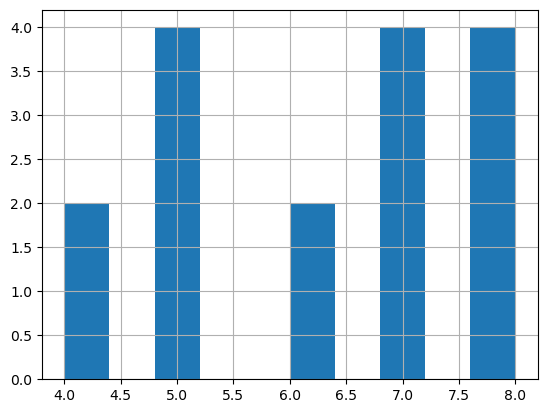

In [97]:
sl.loc[sl['cond']=='spaced', 'lag'].hist()

In [98]:
tl = pd.DataFrame(blocks[0]['test'])
tl

,filename,in_out,loc,cond,pres_num,type,lag
0,in0326.jpg,indoor,indoor,massed,1,target,1
1,out1578.jpg,outdoor,outdoor,massed,1,lure,1
2,out0063_new.jpg,outdoor,outdoor,spaced,1,target,7
3,out0026_new.jpg,outdoor,outdoor,massed,1,lure,1
4,in0096.jpg,indoor,indoor,spaced,1,lure,4
5,out0152_new.jpg,outdoor,outdoor,spaced,1,lure,6
6,in0269.jpg,indoor,indoor,massed,1,target,1
7,in0127.jpg,indoor,indoor,massed,1,lure,1
8,in0300.jpg,indoor,indoor,once,1,lure,0
9,out0564.jpg,outdoor,outdoor,massed,1,target,1


In [99]:
tl.groupby(['type', 'cond', 'loc']).count()

filename  in_out  pres_num  lag
type   cond   loc                                     
lure   massed indoor          4       4         4    4
              outdoor         4       4         4    4
       once   indoor          4       4         4    4
              outdoor         4       4         4    4
       spaced indoor          4       4         4    4
              outdoor         4       4         4    4
target massed indoor          4       4         4    4
              outdoor         4       4         4    4
       once   indoor          4       4         4    4
              outdoor         4       4         4    4
       spaced indoor          4       4         4    4
              outdoor         4       4         4    4

In [100]:
# save the blocks out to a pickle file
# (note the 'b' in the 'wb', which means a 
# binary stream instead of a ascii text stream)
pickle.dump(blocks, open('spaced_blocks.pickle', 'wb'))